<center> <span style="font-size:30px;"><span style="color:black;"><b>SC1015 Mini Project</b></span></span> </center>
<br>
<center> <span style="font-size:30px;"><span style="color:black;"><b>Heart Disease Predictor</b></span></span> </center>


<span style="font-size:12px;"><span style="color:red;"><b>Group Members:</b></span></span> 
<br>
Koh Wee Xuan (U2320197F)
<br>
Woo Weng Tai (U2322615J)
<br>
Teo Liang Wei, Ryan (U2321344G)


# Importing of Required Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report, confusion_matrix
import warnings


# 1. Analyse of Data
For our mini-project we will be using the FramingHam data set from Kaggle. The aim of this project is to predict if a patient has a 10 years risk of future (CHD) coronary heart disease.
<br>
We will begin by importing the data and going through the variables in the data set

In [2]:
heartData = pd.read_csv('framingham.csv')
heartData.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Information about the Variables
heartData.info()
heartData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


(4238, 16)

In [4]:
heartData.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Summary of results

# 2. Cleaning/Preprocessing of Data

## Missing Value Cleaning
Check to see if there is any null values in the data set

In [5]:
# Percentage of null values in each column
(heartData.isnull().sum()/heartData.shape[0])*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [6]:
#Median to fill 0 values if diabetes is 1
diabetesIs1_data = heartData[heartData['diabetes']==1]
median_glucose_diabetes_1 = diabetesIs1_data['glucose'].median()
#Median to fill 0 values if currentSmoker is 0
currentSmokerIs0_data = heartData[heartData['currentSmoker']==0]
median_heartRate_currentSmoker_0 = currentSmokerIs0_data['heartRate'].median()

heartData.fillna({'education': 0,
                  'cigsPerDay': heartData['cigsPerDay'].where(heartData['currentSmoker'] == 1).median(),
                  'BPMeds': 0,
                  'totChol': heartData['totChol'].median(),
                  'BMI': heartData['BMI'].median(),
                  'heartRate': heartData['heartRate'].where(heartData['currentSmoker'] == 1).median(),
                  'glucose': heartData['glucose'].where(heartData['diabetes'] == 0).median()},
                  inplace=True)
# Additional step for filling missing values with median values for heartRate and glucose when 'currentSmoker' is 0 and 'diabetes' is 1 respectively
heartData.fillna({'heartRate': median_heartRate_currentSmoker_0,
                  'glucose': median_glucose_diabetes_1},
                  inplace=True)

In [7]:
# Checking if there are any misisng values:
(heartData.isnull().sum()/heartData.shape[0])*100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

## Outlier cleaning
Identify which variables needs outliers cleaning and remove the outlier rows

In [8]:
# Backing up data sets for any just in case
heartData_Copy = heartData.copy()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          12
BPMeds             124
prevalentStroke     25
prevalentHyp         0
diabetes           109
totChol             57
sysBP              126
diaBP               81
BMI                 97
heartRate           76
glucose            262
TenYearCHD         644
dtype: int64


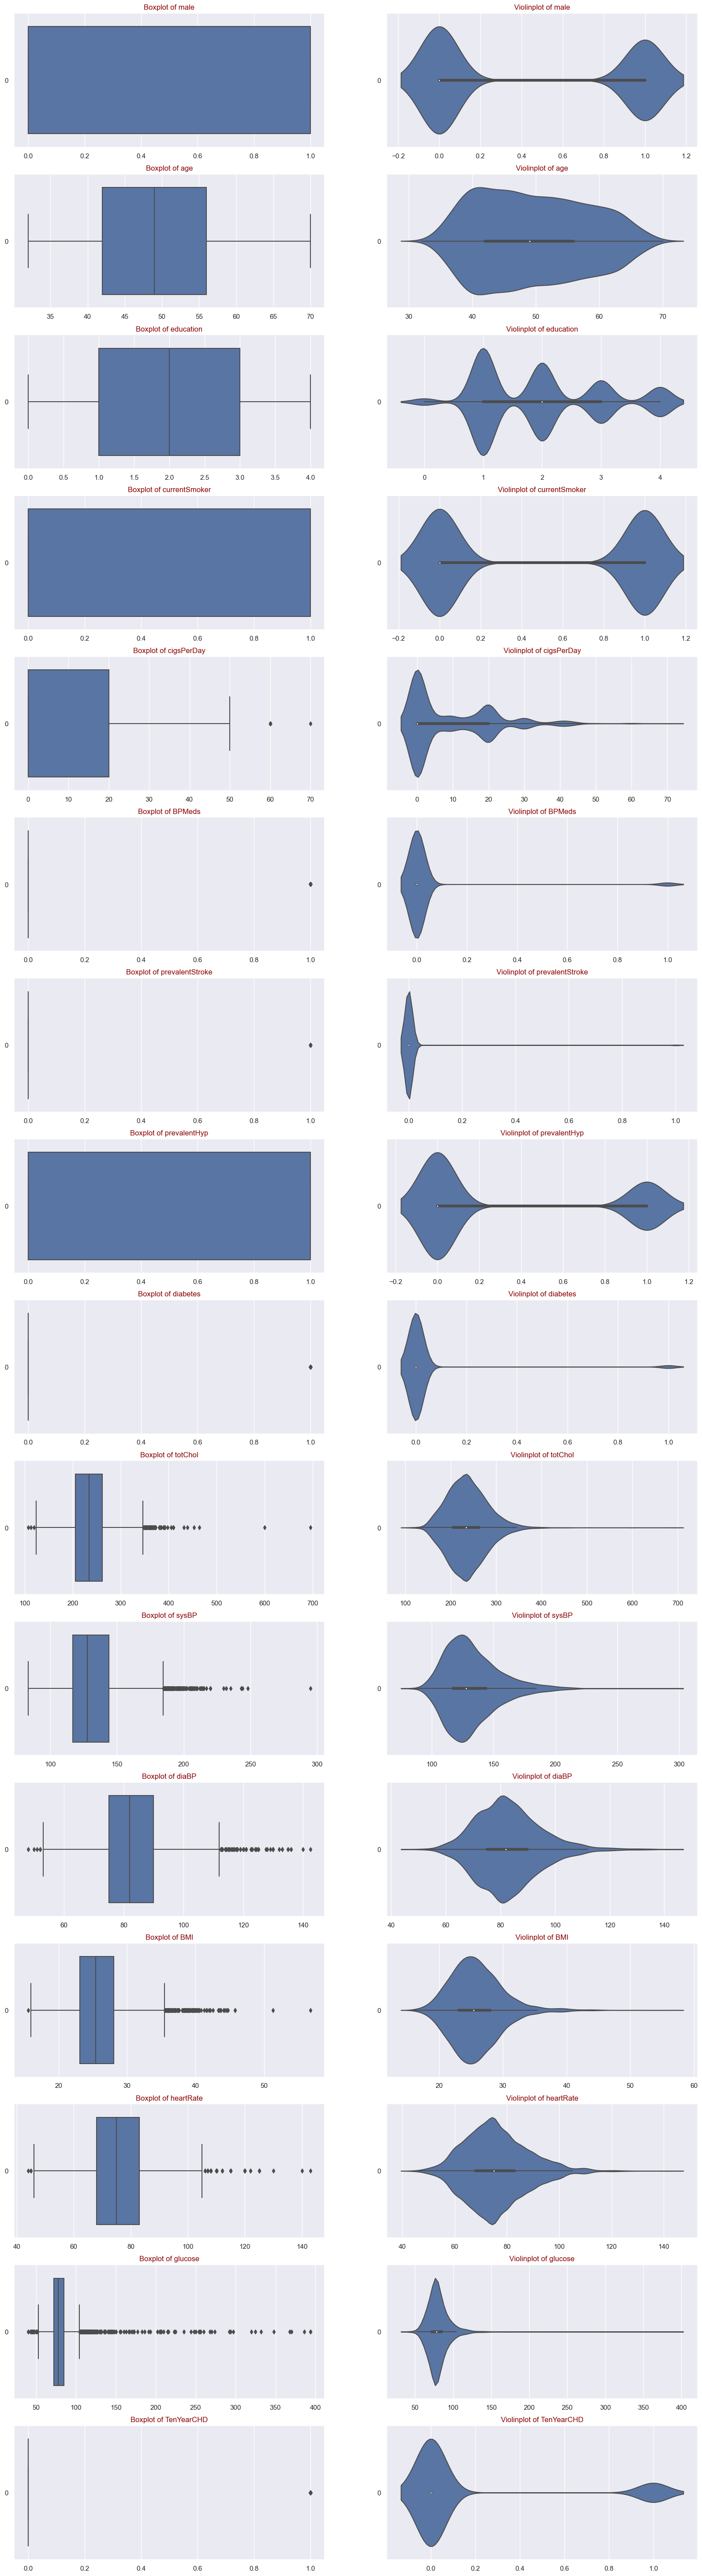

In [9]:
# Draw the distributions of all variables
f, axes = plt.subplots(16, 2, figsize=(20,75))

count = 0
for var in heartData:
    sb.boxplot(data = heartData[var], orient = "h", ax = axes[count,0])
    axes[count,0].set_title(f'Boxplot of {var}', color='DarkRed')  
    sb.violinplot(data = heartData[var], orient = "h", ax = axes[count,1])
    axes[count,1].set_title(f'Violinplot of {var}', color='DarkRed') 
    count += 1
    
#Calculate outliers
Q1 = heartData.quantile(0.25)
Q3 = heartData.quantile(0.75)
IQR = Q3 - Q1
print (((heartData < (Q1 - 1.5 * IQR)) | (heartData > (Q3 + 1.5 * IQR))).sum())

In [10]:
# Extracting variables that requires outlier remove
outlier_variables = ['cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [11]:
# To remove outliers
for var in outlier_variables:
    Q1 = heartData[var].quantile(0.25)
    Q3 = heartData[var].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    heartData = heartData[(heartData[var] < UL) & (heartData[var] > LL)] 

In [12]:
print('There were {} rows before outlier treatment.'.format(heartData_Copy.shape[0]))
print('There are {} rows after outlier treatment.'.format(heartData.shape[0]))
print('After outlier treatment number of rows lost are {}.'.format(heartData_Copy.shape[0] - heartData.shape[0]))

There were 4238 rows before outlier treatment.
There are 3620 rows after outlier treatment.
After outlier treatment number of rows lost are 618.


# 3. Exploratory Analysis
Now we have a processed data set, we will start by finding out which variables play a strong factor in determining the final prediction result.
<br>
First lets explore each variables by generating various graphs.


In [27]:
heartData.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000
mean,0.438950,49.024862,1.966022,0.501657,9.127901,0.020442,0.004972,0.261878,0.005249,233.737845,128.824862,81.415608,25.376820,74.628177,77.904144,0.133149
std,0.496327,8.482216,1.056673,0.500066,11.611299,0.141526,0.070349,0.439718,0.072267,39.917808,17.907190,10.285533,3.454602,10.809735,9.813933,0.339783
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,53.000000,16.480000,45.000000,53.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,115.500000,74.000000,22.927500,67.000000,72.000000,0.000000
50%,0.000000,48.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,232.000000,126.000000,81.000000,25.160000,75.000000,78.000000,0.000000
75%,1.000000,55.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,260.000000,140.000000,88.000000,27.680000,80.000000,84.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,45.000000,1.000000,1.000000,1.000000,1.000000,345.000000,183.000000,110.000000,35.200000,104.000000,104.000000,1.000000


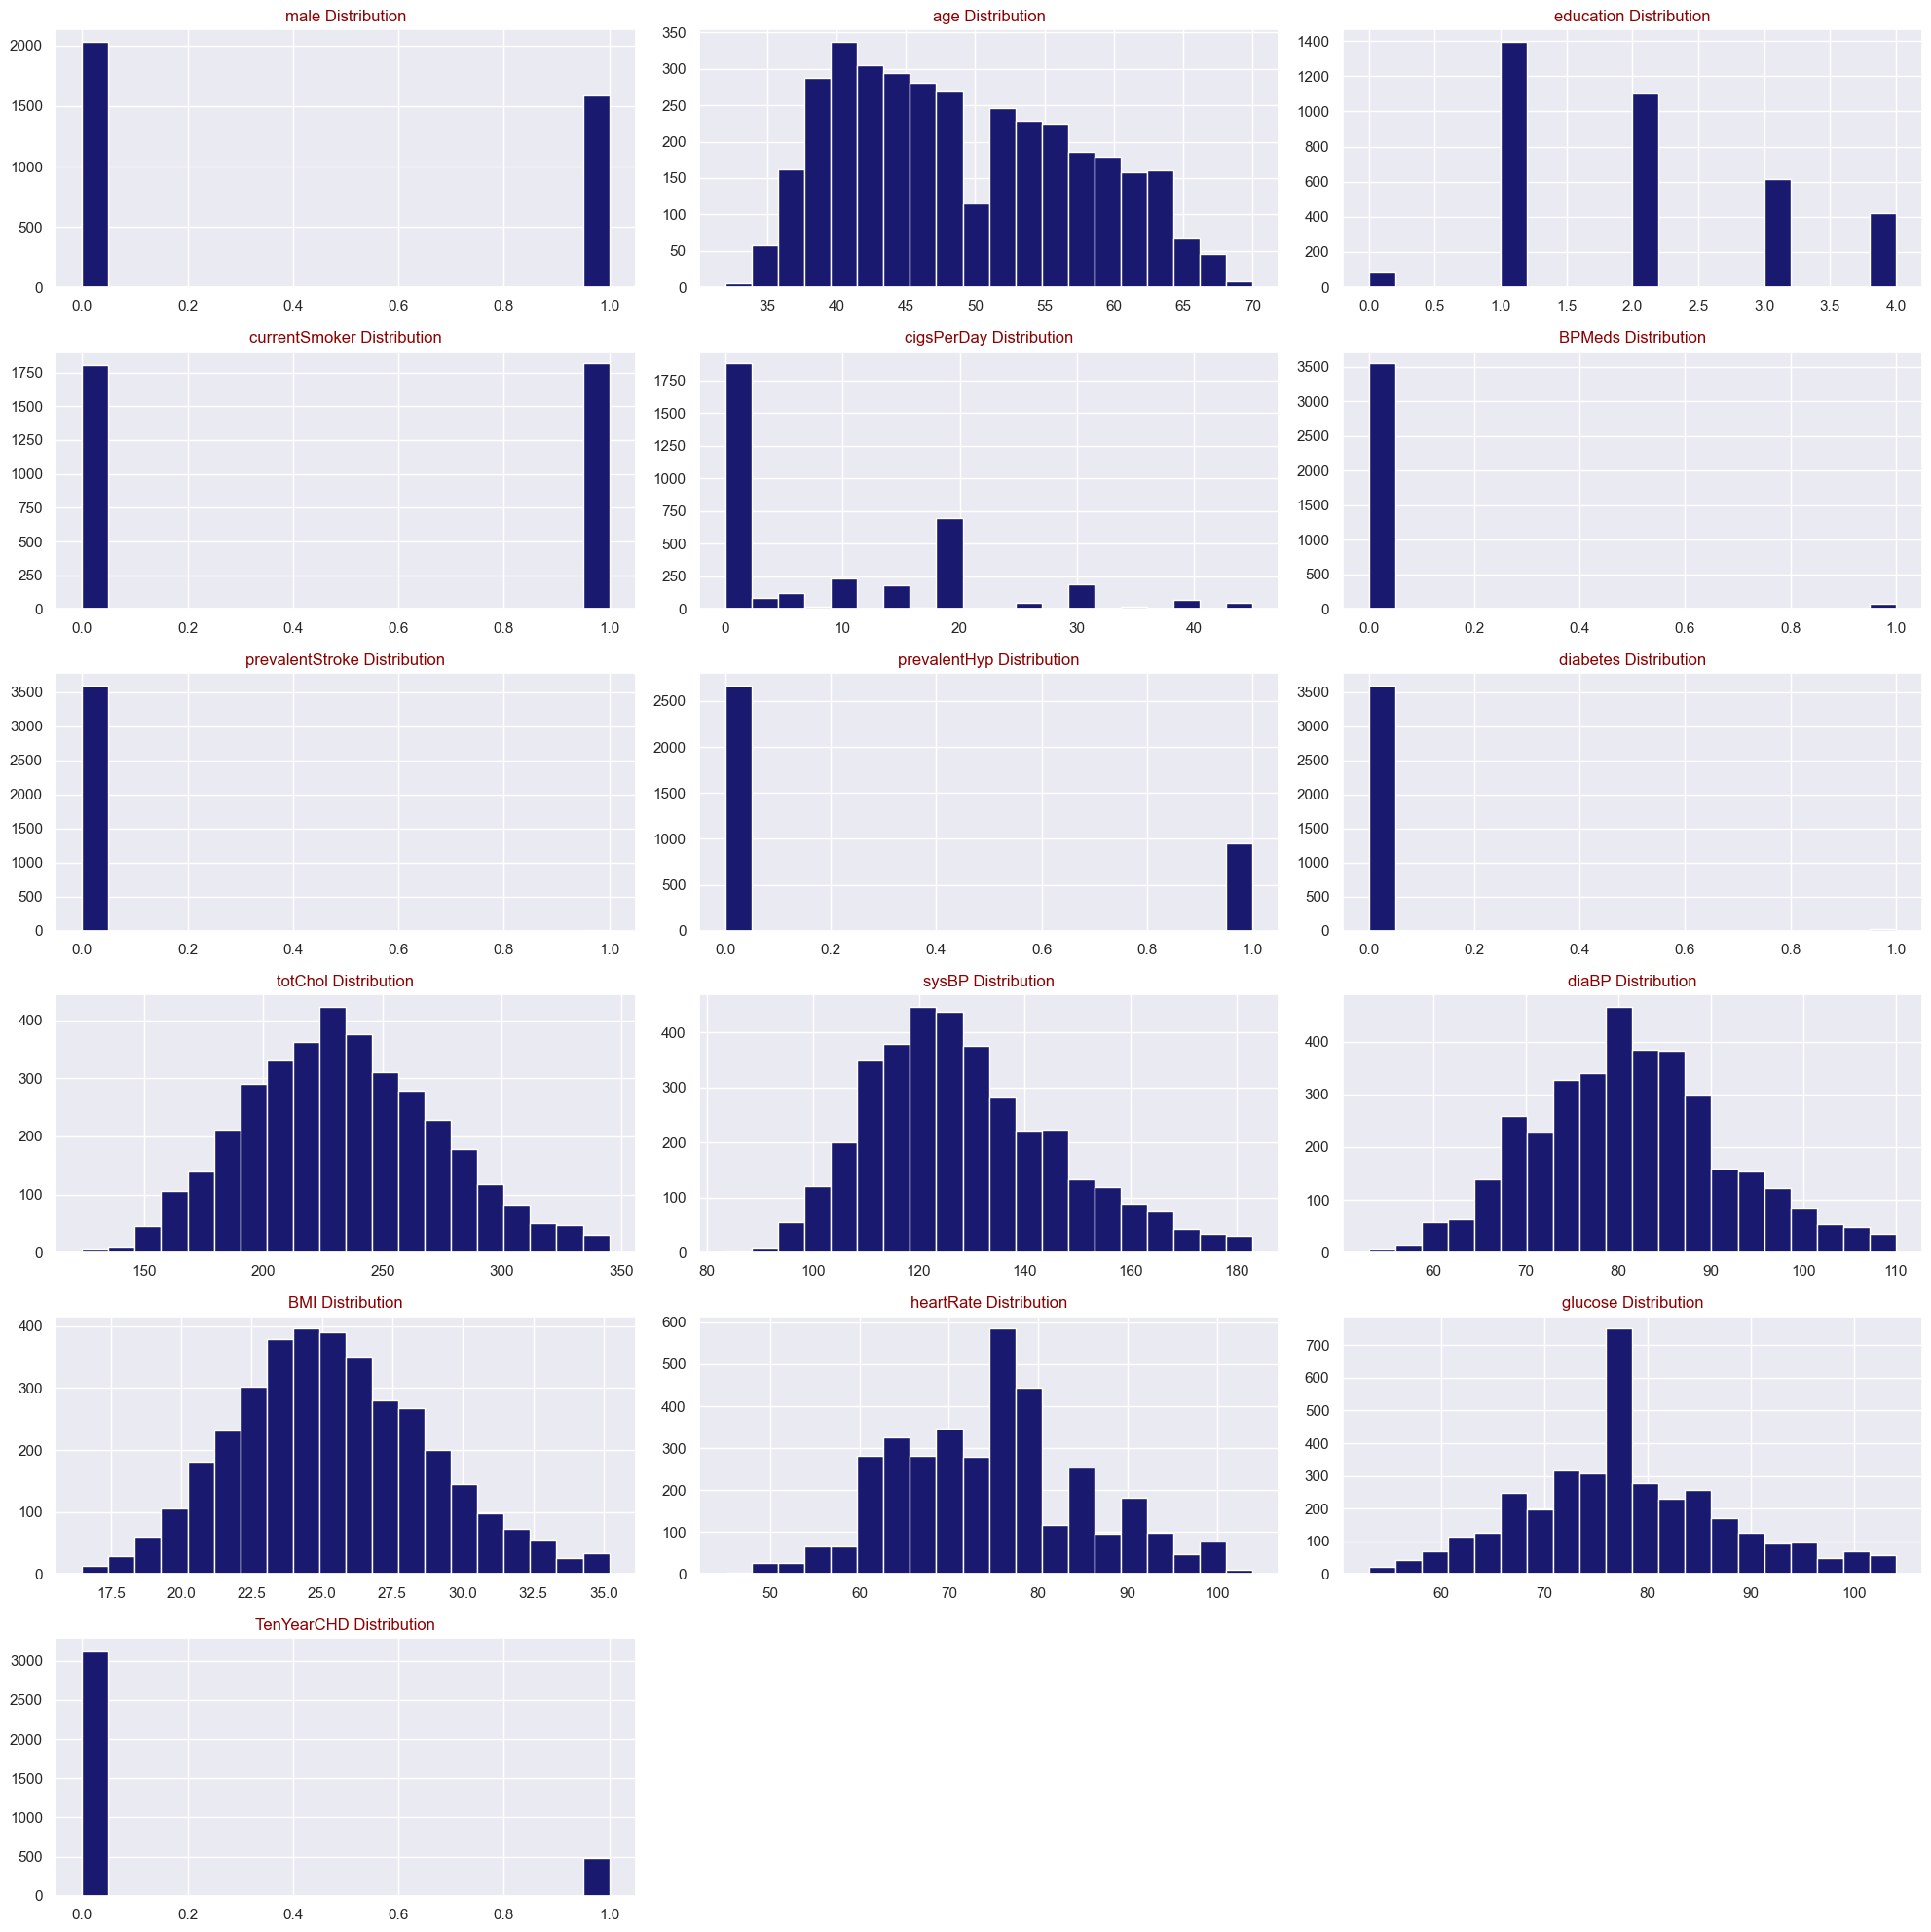

In [28]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heartData,heartData.columns,6,3)

In [29]:
heartData.TenYearCHD.value_counts()

TenYearCHD
0    3138
1     482
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

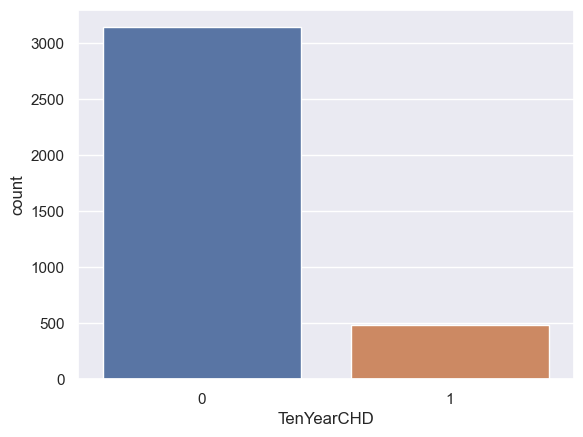

In [30]:
sb.countplot(x='TenYearCHD',data=heartData)

There are 3138 patients with no heart disease and 482 patients with risk of heart disease

We will generate a correlation matrix to evaluate the relationship between every variables in the data set by looking at its correlation coefficient.

<Figure size 1000x800 with 0 Axes>

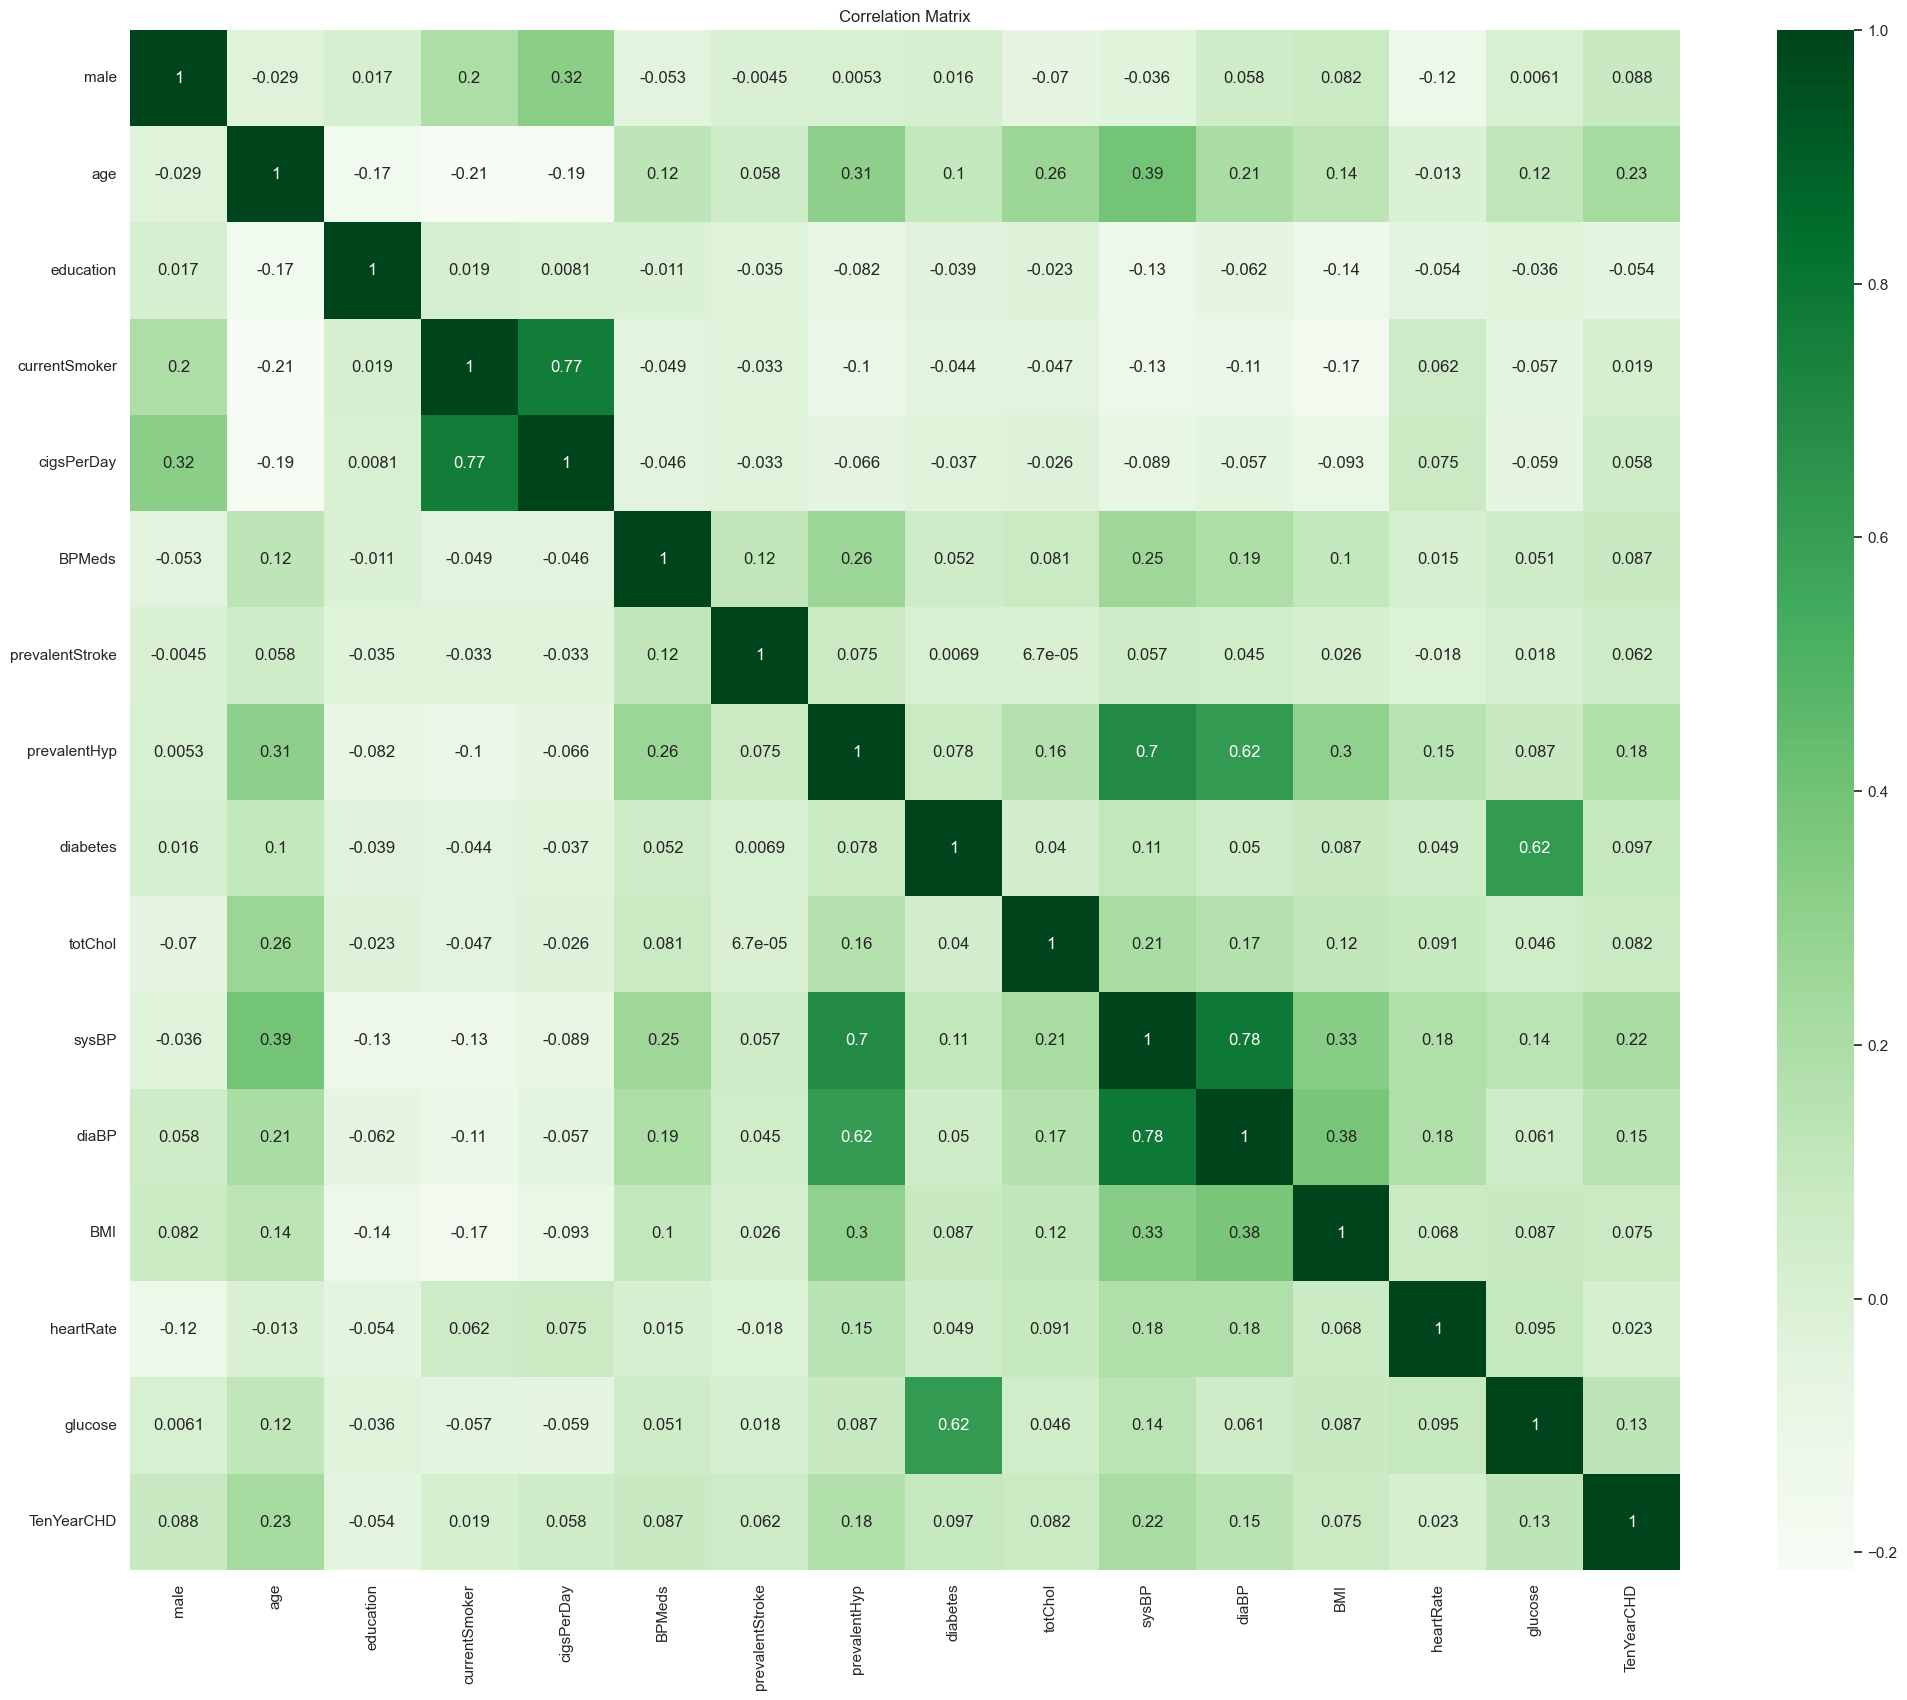

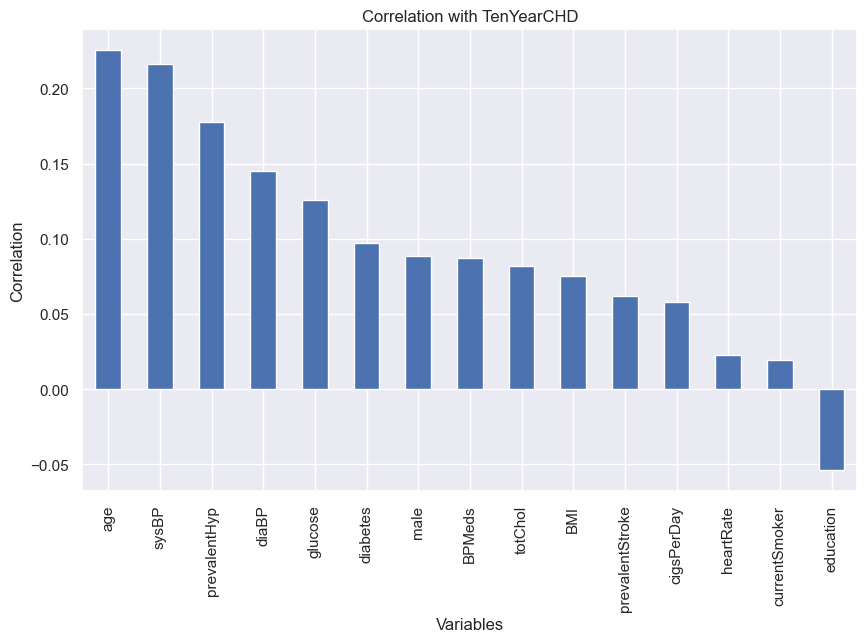

In [11]:
# Calculate the correlation matrix
correlation_matrix = heartData.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
fig , ax = plt.subplots(figsize=(25 , 20))
sb.heatmap(correlation_matrix, annot=True, cmap='Greens', ax=ax)
plt.title('Correlation Matrix')
plt.show()
sorted_correlations = tenyearchd_correlations.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sorted_correlations.plot(kind='bar')
plt.title("Correlation with TenYearCHD")
plt.xlabel("Variables")
plt.ylabel("Correlation")
plt.show()

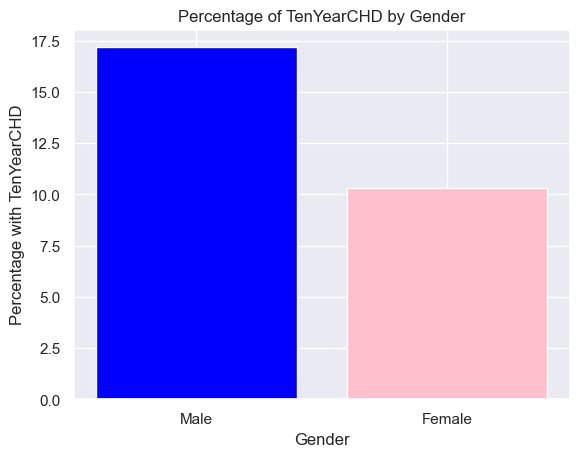

In [32]:
# Calculate percentage of males and females with TenYearCHD
male_chd_percentage = heartData[heartData['male'] == 1]['TenYearCHD'].mean() * 100
female_chd_percentage = heartData[heartData['male'] == 0]['TenYearCHD'].mean() * 100

# Plotting
plt.bar(['Male', 'Female'], [male_chd_percentage, female_chd_percentage], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Percentage with TenYearCHD')
plt.title('Percentage of TenYearCHD by Gender')
plt.show()

In [33]:
print("As a male, you would have a {:.2f}% higher chance of getting diagnosed with CHD in the next 10 years".format((male_chd_percentage-female_chd_percentage)*100/female_chd_percentage))

As a male, you would have a 66.96% higher chance of getting diagnosed with CHD in the next 10 years


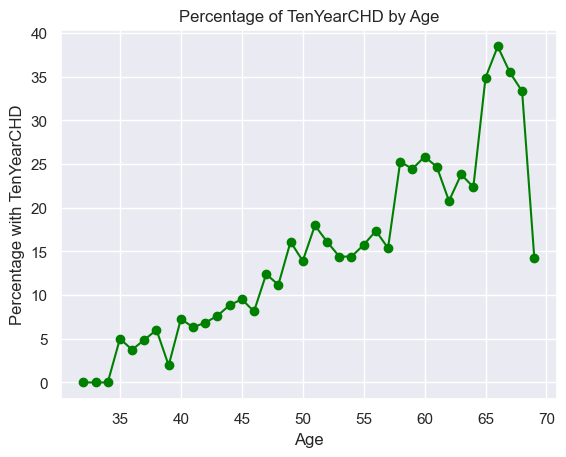

In [34]:
# Calculate percentage of individuals with TenYearCHD for every age
age_chd_percentage = []

for age in range(30, 70):  # From 30 to 70 inclusive
    chd_percentage = heartData[heartData['age'] == age]['TenYearCHD'].mean() * 100
    age_chd_percentage.append(chd_percentage)

# Plotting
plt.plot(range(30, 70), age_chd_percentage, color='green', marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Percentage with TenYearCHD')
plt.title('Percentage of TenYearCHD by Age')
plt.grid(True)
plt.show()

In [35]:
# Fit logistic regression model
X = heartData[['age']]
y = heartData['TenYearCHD']
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Extract coefficient associated with age
age_coefficient = log_reg.coef_[0][0]

# Calculate percentage increase in odds per year increase in age
odds_increase_per_year = np.exp(age_coefficient) - 1
percentage_increase_per_year = odds_increase_per_year * 100

print("Percentage increase in odds of TenYearCHD per year increase in age: {:.2f}%".format(percentage_increase_per_year))

Percentage increase in odds of TenYearCHD per year increase in age: 7.66%


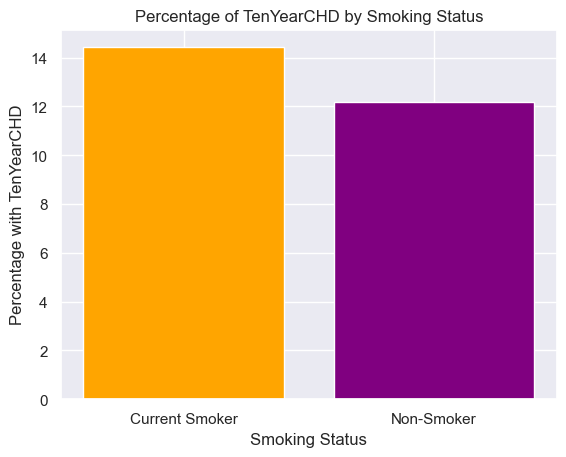

In [36]:
# Calculate percentage of current smokers and non-smokers with TenYearCHD
current_smoker_chd_percentage = heartData[heartData['currentSmoker'] == 1]['TenYearCHD'].mean() * 100
non_smoker_chd_percentage = heartData[heartData['currentSmoker'] == 0]['TenYearCHD'].mean() * 100

# Plotting
plt.bar(['Current Smoker', 'Non-Smoker'], [current_smoker_chd_percentage, non_smoker_chd_percentage], color=['orange', 'purple'])
plt.xlabel('Smoking Status')
plt.ylabel('Percentage with TenYearCHD')
plt.title('Percentage of TenYearCHD by Smoking Status')
plt.show()

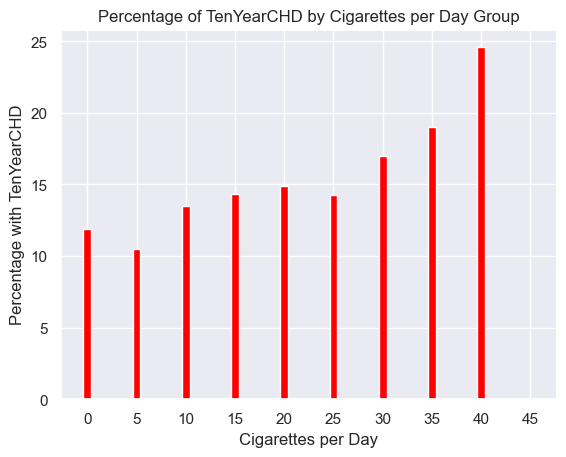

In [37]:
# Calculate percentage of individuals in different cigarette per day groups with TenYearCHD
cigs_per_day_groups = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
cigs_per_day_chd_percentage = []

for cigs_per_day in cigs_per_day_groups:
    chd_percentage = heartData[(heartData['cigsPerDay'] >= cigs_per_day) & (heartData['cigsPerDay'] < cigs_per_day + 5)]['TenYearCHD'].mean() * 100
    cigs_per_day_chd_percentage.append(chd_percentage)

# Plotting
plt.bar(cigs_per_day_groups, cigs_per_day_chd_percentage, color='red')
plt.xlabel('Cigarettes per Day')
plt.ylabel('Percentage with TenYearCHD')
plt.title('Percentage of TenYearCHD by Cigarettes per Day Group')
plt.xticks(cigs_per_day_groups)
plt.show()

In [38]:
# Fit logistic regression model
X = heartData[['cigsPerDay']]
y = heartData['TenYearCHD']
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Extract coefficient associated with 'cigsPerDay'
cigs_per_day_coefficient = log_reg.coef_[0][0]

# Calculate increase in risk of TenYearCHD per cigarette increase
risk_increase_per_cig = np.exp(cigs_per_day_coefficient) - 1
percentage_risk_increase_per_cig = risk_increase_per_cig *100

print("Increase in risk of TenYearCHD per cigarette increase: {:.2f}%".format(percentage_risk_increase_per_cig))

Increase in risk of TenYearCHD per cigarette increase: 1.64%


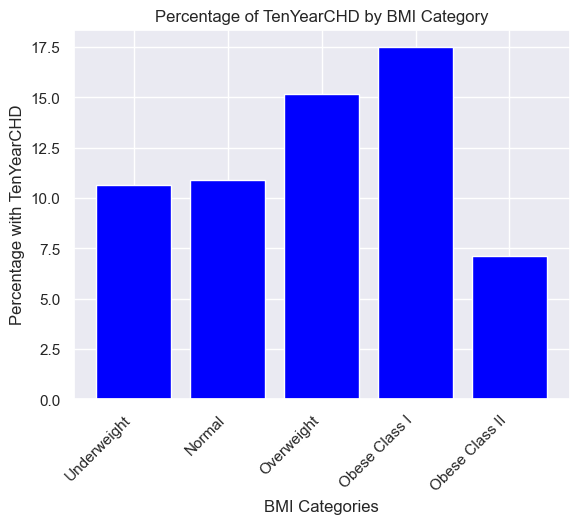

In [39]:
bmi_groups = [0, 18.5, 25, 30, 35, 40, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III']
bmi_chd_percentage = []

for i in range(len(bmi_groups) - 1):
    lower_bound = bmi_groups[i]
    upper_bound = bmi_groups[i + 1]
    chd_percentage = heartData[(heartData['BMI'] >= lower_bound) & (heartData['BMI'] < upper_bound)]['TenYearCHD'].mean() * 100
    bmi_chd_percentage.append(chd_percentage)

# Plotting
plt.bar(bmi_labels, bmi_chd_percentage, color='blue')
plt.xlabel('BMI Categories')
plt.ylabel('Percentage with TenYearCHD')
plt.title('Percentage of TenYearCHD by BMI Category')
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
# Fit logistic regression model
X = heartData[['BMI']]
y = heartData['TenYearCHD']
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Extract coefficient associated with 'BMI'
bmi_coefficient = log_reg.coef_[0][0]

# Calculate increase in risk of TenYearCHD per unit increase in BMI
risk_increase_per_bmi = np.exp(bmi_coefficient) - 1
percentage_risk_increase_per_bmi = risk_increase_per_bmi *100
print("Increase in risk of TenYearCHD per unit increase in BMI: {:.2f}%".format(percentage_risk_increase_per_bmi))

Increase in risk of TenYearCHD per unit increase in BMI: 4.96%


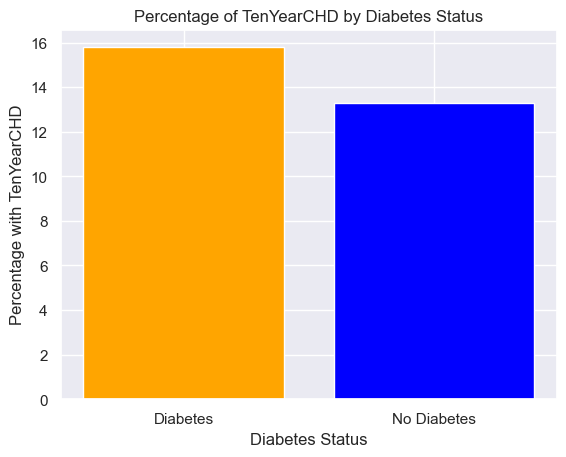

In [41]:
diabetes_chd_percentage = heartData[heartData['diabetes'] == 1]['TenYearCHD'].mean() * 100
no_diabetes_chd_percentage = heartData[heartData['diabetes'] == 0]['TenYearCHD'].mean() * 100

# Plotting
plt.bar(['Diabetes', 'No Diabetes'], [diabetes_chd_percentage, no_diabetes_chd_percentage], color=['orange', 'blue'])
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage with TenYearCHD')
plt.title('Percentage of TenYearCHD by Diabetes Status')
plt.show()

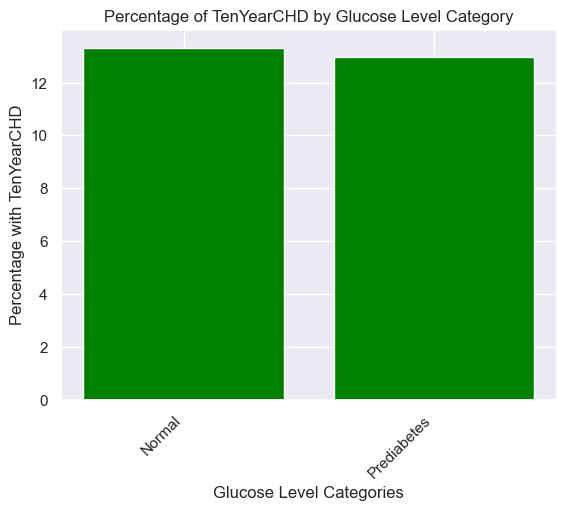

In [42]:
# Calculate percentage of individuals in different glucose level groups with TenYearCHD
glucose_groups = [0, 100, 125, 150, 200, float('inf')]
glucose_labels = ['Normal', 'Prediabetes', 'Borderline Diabetes', 'Diabetes', 'Severe Diabetes']
glucose_chd_percentage = []

for i in range(len(glucose_groups) - 1):
    lower_bound = glucose_groups[i]
    upper_bound = glucose_groups[i + 1]
    chd_percentage = heartData[(heartData['glucose'] >= lower_bound) & (heartData['glucose'] < upper_bound)]['TenYearCHD'].mean() * 100
    glucose_chd_percentage.append(chd_percentage)

# Plotting
plt.bar(glucose_labels, glucose_chd_percentage, color='green')
plt.xlabel('Glucose Level Categories')
plt.ylabel('Percentage with TenYearCHD')
plt.title('Percentage of TenYearCHD by Glucose Level Category')
plt.xticks(rotation=45, ha='right')
plt.show()

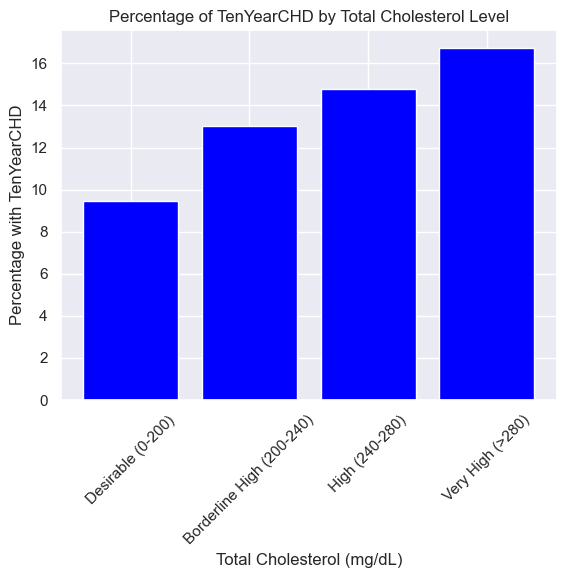

In [43]:
totChol_bins = [0, 200, 240, 280, float('inf')]
totChol_labels = ['Desirable (0-200)', 'Borderline High (200-240)', 'High (240-280)', 'Very High (>280)']

# Calculate percentage of TenYearCHD for each bin
totChol_chd_percentage = []
for i in range(len(totChol_bins) - 1):
    lower_bound = totChol_bins[i]
    upper_bound = totChol_bins[i + 1]
    chd_percentage = heartData[(heartData['totChol'] >= lower_bound) & (heartData['totChol'] < upper_bound)]['TenYearCHD'].mean() * 100
    totChol_chd_percentage.append(chd_percentage)

# Plotting
plt.bar(totChol_labels, totChol_chd_percentage, color='blue')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Percentage with TenYearCHD')
plt.title('Percentage of TenYearCHD by Total Cholesterol Level')
plt.xticks(rotation=45)
plt.show()

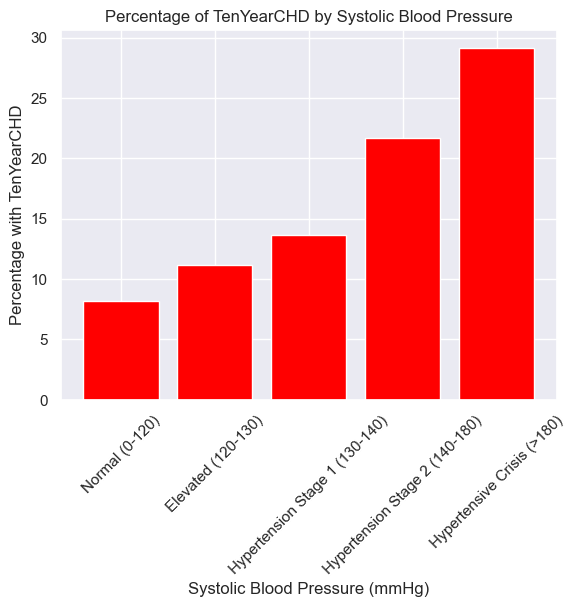

In [44]:
sysBP_bins = [0, 120, 130, 140, 180, float('inf')]
sysBP_labels = ['Normal (0-120)', 'Elevated (120-130)', 'Hypertension Stage 1 (130-140)', 'Hypertension Stage 2 (140-180)', 'Hypertensive Crisis (>180)']

# Calculate percentage of TenYearCHD for each bin of sysBP
sysBP_chd_percentage = []
for i in range(len(sysBP_bins) - 1):
    lower_bound = sysBP_bins[i]
    upper_bound = sysBP_bins[i + 1]
    chd_percentage = heartData[(heartData['sysBP'] >= lower_bound) & (heartData['sysBP'] < upper_bound)]['TenYearCHD'].mean() * 100
    sysBP_chd_percentage.append(chd_percentage)

# Plotting sysBP
plt.bar(sysBP_labels, sysBP_chd_percentage, color='red')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Percentage with TenYearCHD')
plt.title('Percentage of TenYearCHD by Systolic Blood Pressure')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Fit logistic regression model
X = heartData[['sysBP']]
y = heartData['TenYearCHD']
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Extract coefficient associated with 'sysBP'
sysBP_coefficient = log_reg.coef_[0][0]

# Calculate increase in risk of TenYearCHD per unit increase in sysBP
risk_increase_per_sysBP = np.exp(sysBP_coefficient) - 1
percentage_risk_increase_per_sysBP = risk_increase_per_sysBP *100
print("Increase in risk of TenYearCHD per unit increase in systolic blood pressure (sysBP): {:.2f}%".format(percentage_risk_increase_per_sysBP))

Increase in risk of TenYearCHD per unit increase in systolic blood pressure (sysBP): 2.65%


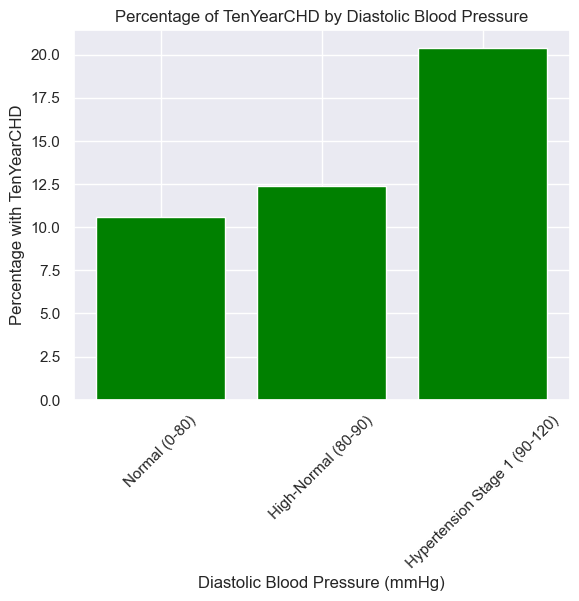

In [46]:
# Define bins for Diastolic Blood Pressure (diaBP)
diaBP_bins = [0, 80, 90, 120, float('inf')]
diaBP_labels = ['Normal (0-80)', 'High-Normal (80-90)', 'Hypertension Stage 1 (90-120)', 'Hypertension Stage 2 (>120)']

# Calculate percentage of TenYearCHD for each bin of diaBP
diaBP_chd_percentage = []
for i in range(len(diaBP_bins) - 1):
    lower_bound = diaBP_bins[i]
    upper_bound = diaBP_bins[i + 1]
    chd_percentage = heartData[(heartData['diaBP'] >= lower_bound) & (heartData['diaBP'] < upper_bound)]['TenYearCHD'].mean() * 100
    diaBP_chd_percentage.append(chd_percentage)

# Plotting diaBP
plt.bar(diaBP_labels, diaBP_chd_percentage, color='green')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Percentage with TenYearCHD')
plt.title('Percentage of TenYearCHD by Diastolic Blood Pressure')
plt.xticks(rotation=45)
plt.show()

Summary of results

# 4. Exploring of Machine Learning Techniques
Now we explored the variables, we will be trying out different machine learning techniques to see which methods gives the best accuracy and using the confusion matrix to try out the prediction using test values.
<br>
We will be predicting TenYearCHD using the rest of variables. TenYearCHD is a boolean data type consisting of 0 and 1 (True and False), so machine learning techniques catering to classification will be explored.

In [13]:
#Importing additional libraries for graph plotting of model results
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [14]:
X = heartData.drop('TenYearCHD' , axis= 'columns')
y = heartData['TenYearCHD']

Create appropriate datasets for Train and Test in an 80:20 ratio.

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , shuffle=True , random_state=4)

In [16]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Baseline Classifer
A baseline classifier will be used to provide a simple, minimalistic model that serves as a reference point for evaluating the performance of more complex models. This establish a performance benchmark when we make our comparison with other models and our final justification in picking the best machine learning technique to generate the final model for our predicition.

In [51]:
#baseline classifier

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train , y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.8826


## Logistic Regression
A regression analysis describe data and explain relationship between 1 binary variable and one or more nominal, ordinal or interval independent variables. The outcome from this analysis will give a 'Yes' or 'No' result.

In [52]:
#logistic regression model

lr_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , LogisticRegression(penalty='l2' , C= 12 ,max_iter=1500))
lr_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=12, max_iter=1500))])

In [53]:
lr_model.score(X_train , y_train)

0.8660220994475138

In [54]:
lr_pred = lr_model.predict(X_test)
lr_acc_score = accuracy_score(y_test , lr_pred)
lr_acc_score

0.8839779005524862

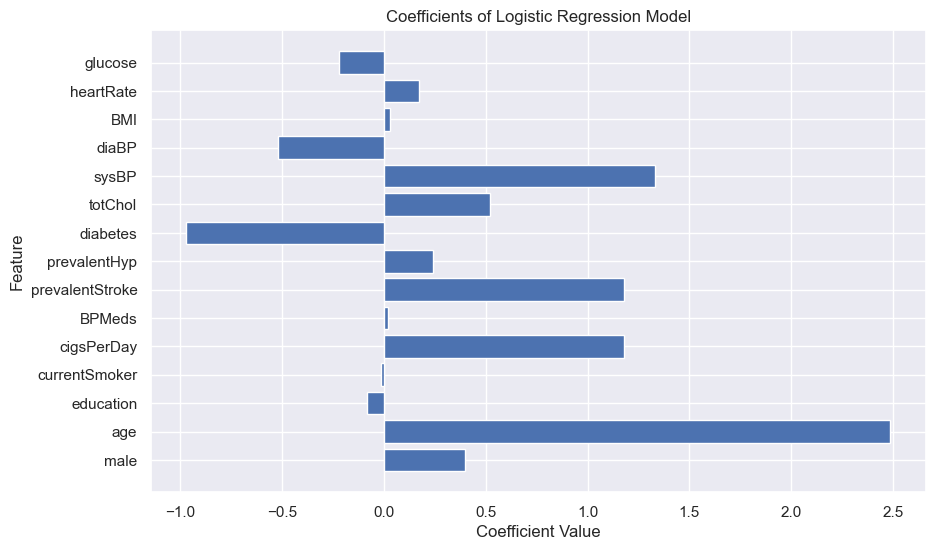

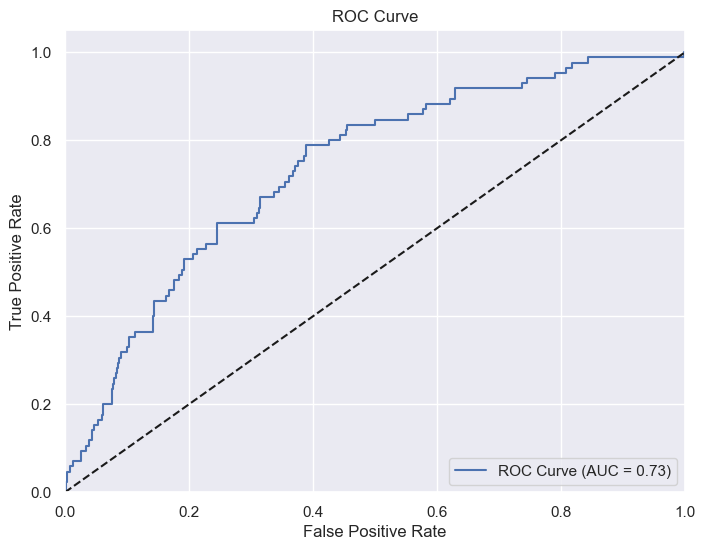

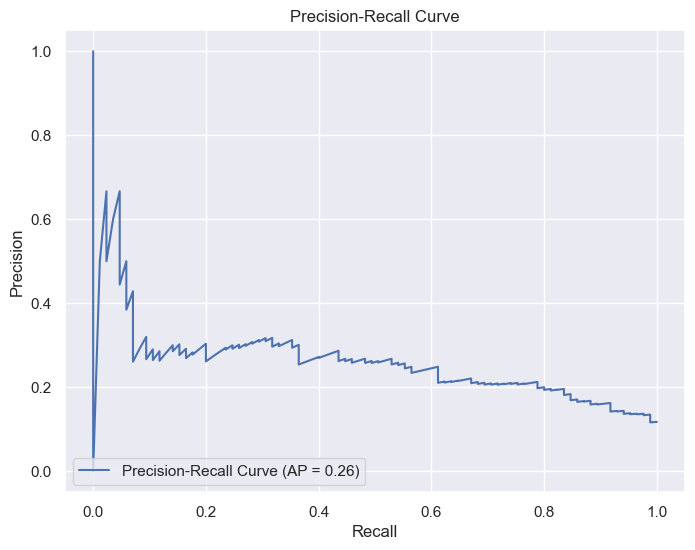

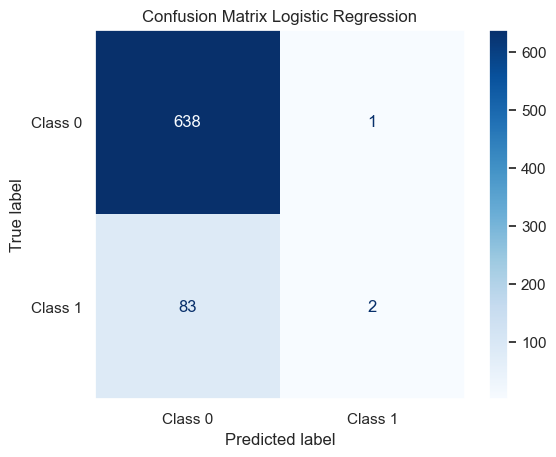

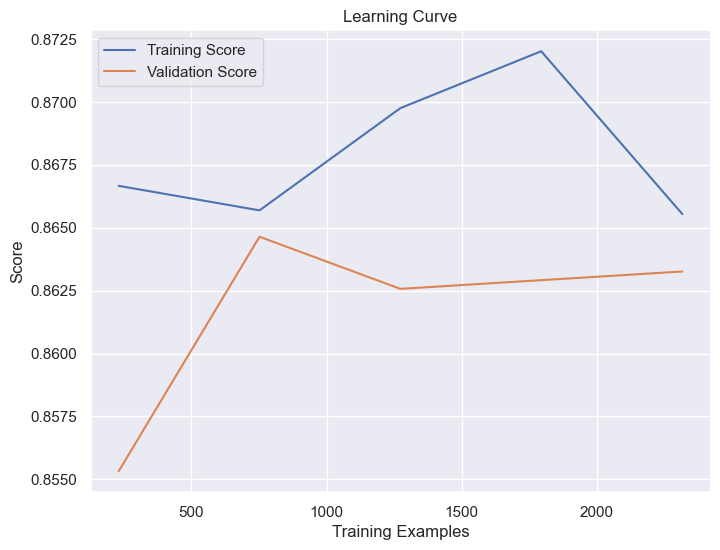

In [64]:
# Coefficients Plot
coefficients = lr_model.named_steps['logisticregression'].coef_.flatten()
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

# ROC Curve
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision_score(y_test, y_pred_proba)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, lr_model.predict(X_test)), display_labels=["Class 0", "Class 1"])
confusion_matrix_display.plot(cmap='Blues')
plt.grid(False)
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(lr_model, X_train, y_train, cv=5)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [65]:
#Print out FPR TPR
tn, fp, fn, tp = confusion_matrix(y_test, lr_model.predict(X_test)).ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("Logistic Regression TPR and FPR")
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)

Logistic Regression TPR and FPR
True Positive Rate (TPR): 0.023529411764705882
False Positive Rate (FPR): 0.001564945226917058


## Decision Tree

In [66]:
#decision tree model

dt_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , DecisionTreeClassifier())
dt_model.fit(X_train , y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [68]:
dt_pred = dt_model.predict(X_test)
dt_acc_score = accuracy_score(y_test , dt_pred)
dt_acc_score

0.7776243093922652

<Figure size 800x600 with 0 Axes>

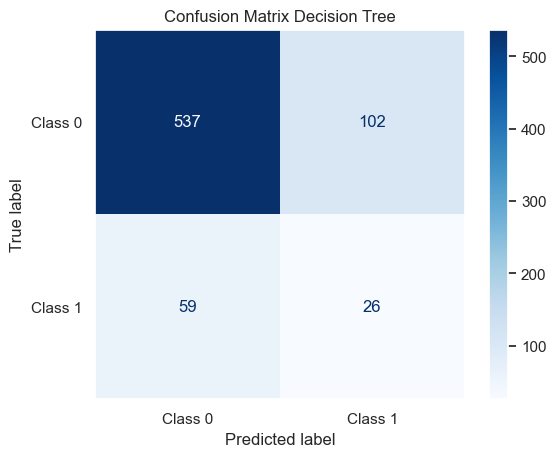

In [73]:
confusion_matrix_display_dt = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_model.predict(X_test)), display_labels=["Class 0", "Class 1"])
plt.figure(figsize=(8, 6))
confusion_matrix_display_dt.plot(cmap='Blues')  
plt.grid(False)  

# Customize plot
plt.title('Confusion Matrix Decision Tree')
plt.show()

In [76]:
#Print out FPR TPR
tn, fp, fn, tp = confusion_matrix(y_test, dt_model.predict(X_test)).ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("Decision Tree TPR and FPR")
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)

Decision Tree TPR and FPR
True Positive Rate (TPR): 0.3058823529411765
False Positive Rate (FPR): 0.1596244131455399


## Random Forest

In [77]:
#random forest model

rf_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , RandomForestClassifier(n_estimators=500))
rf_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=500))])

In [78]:
y_pred_train = rf_model.predict(X_train)
y_prob_train = rf_model.predict_proba(X_train)[:,1]

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:,1]

print('Classification report for test:\n',classification_report(y_test,y_pred))

Classification report for test:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       639
           1       0.33      0.01      0.02        85

    accuracy                           0.88       724
   macro avg       0.61      0.50      0.48       724
weighted avg       0.82      0.88      0.83       724



In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=1)

params = {
    'n_estimators': sp_randint(5, 25),
    'criterion': ['gini', 'entropy'],
    'max_depth': sp_randint(2, 10),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 20),
    'max_features': sp_randint(2, 15)
}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params, cv=3, random_state=1)

rand_search_rfc.fit(X, y)
print(rand_search_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 3, 'n_estimators': 17}


In [80]:
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)

rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:, 1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:, 1]

print('Classification report for test:\n', classification_report(y_test, y_pred))

Classification report for test:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       639
           1       0.00      0.00      0.00        85

    accuracy                           0.88       724
   macro avg       0.44      0.50      0.47       724
weighted avg       0.78      0.88      0.83       724



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

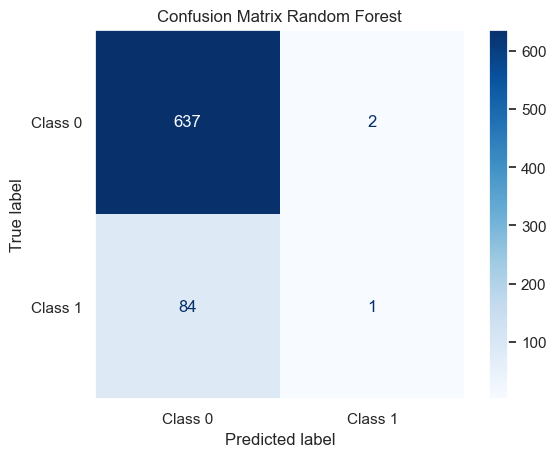

In [81]:
confusion_matrix_display_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_model.predict(X_test)), display_labels=["Class 0", "Class 1"])
plt.figure(figsize=(8, 6))
confusion_matrix_display_rf.plot(cmap='Blues')  
plt.grid(False)  

# Customize plot
plt.title('Confusion Matrix Random Forest')
plt.show()

In [82]:
#Print out FPR TPR
tn, fp, fn, tp = confusion_matrix(y_test, rf_model.predict(X_test)).ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("Random Forest TPR and FPR")
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)

Random Forest TPR and FPR
True Positive Rate (TPR): 0.011764705882352941
False Positive Rate (FPR): 0.003129890453834116


## K-Nearest Neighbour

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8632596685082873


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       639
           1       0.18      0.05      0.07        85

    accuracy                           0.86       724
   macro avg       0.53      0.51      0.50       724
weighted avg       0.80      0.86      0.83       724



<Figure size 800x600 with 0 Axes>

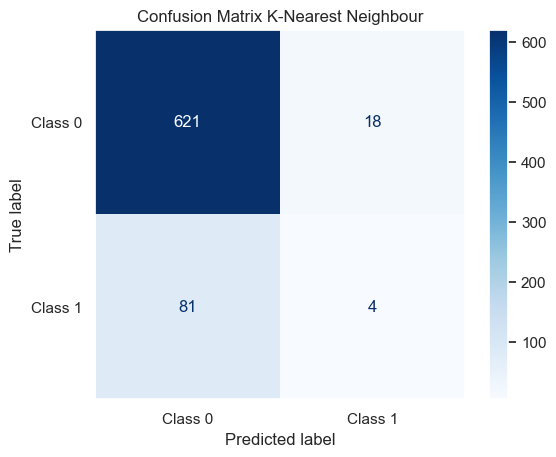

In [35]:
confusion_matrix_display_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, knn_model.predict(X_test)), display_labels=["Class 0", "Class 1"])
plt.figure(figsize=(8, 6))
confusion_matrix_display_rf.plot(cmap='Blues')  
plt.grid(False)  

# Customize plot
plt.title('Confusion Matrix K-Nearest Neighbour')
plt.show()

In [36]:
#Print out FPR TPR
tn, fp, fn, tp = confusion_matrix(y_test, knn_model.predict(X_test)).ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("K-Nearest Neighbour TPR and FPR")
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)

K-Nearest Neighbour TPR and FPR
True Positive Rate (TPR): 0.047058823529411764
False Positive Rate (FPR): 0.028169014084507043


## Convolutional neural network

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define data directories
train_dir = 'C:/Users/kohwe/Documents/Data-Science-Project images/train'
test_dir = 'C:/Users/kohwe/Documents/Data-Science-Project images/test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

# Save the trained model
model.save('cardiomegaly_detection_model.h5')

Found 4438 images belonging to 2 classes.
Found 1114 images belonging to 2 classes.
Epoch 1/10
138/138 [==============================] - 45s 303ms/step - loss: 0.6948 - accuracy: 0.5302 - val_loss: 0.6501 - val_accuracy: 0.6342
Epoch 2/10
138/138 [==============================] - 22s 156ms/step - loss: 0.6572 - accuracy: 0.6135 - val_loss: 0.6552 - val_accuracy: 0.5983
Epoch 3/10
138/138 [==============================] - 25s 184ms/step - loss: 0.6436 - accuracy: 0.6321 - val_loss: 0.6168 - val_accuracy: 0.6811
Epoch 4/10
138/138 [==============================] - 23s 165ms/step - loss: 0.6259 - accuracy: 0.6437 - val_loss: 0.5889 - val_accuracy: 0.6829
Epoch 5/10
138/138 [==============================] - 23s 165ms/step - loss: 0.6031 - accuracy: 0.6707 - val_loss: 0.6003 - val_accuracy: 0.6746
Epoch 6/10
138/138 [==============================] - 23s 167ms/step - loss: 0.5973 - accuracy: 0.6788 - val_loss: 0.5789 - val_accuracy: 0.6710
Epoch 7/10
138/138 [==========================

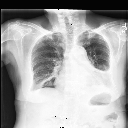

1/1 [==============================] - 0s 17ms/step
Chances of having cardiomegaly: 78.73 %


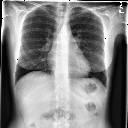

1/1 [==============================] - 0s 16ms/step
Chances of having cardiomegaly: 15.09 %


In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
from IPython.display import display, Image
def predict(image_path):
    # Load a random image
    
    # Display the image
    display(Image(filename=image_path))
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Preprocess the image
    img_array /= 255.0  # Rescale pixel values
    
    # Make prediction
    prediction = model.predict(img_array)
    print("Chances of having cardiomegaly:",round(prediction[0][0]*100,2),"%")
predict("C:/Users/kohwe/Documents/Data-Science-Project images/test/true/5.png")
predict("C:/Users/kohwe/Documents/Data-Science-Project images/test/false/5.png")